In [50]:
# Importin# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

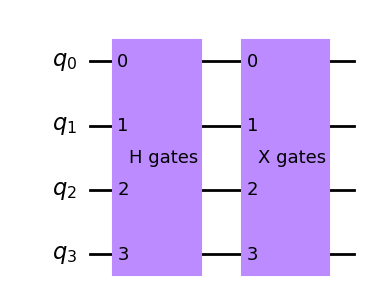

In [33]:
# Make a circuit with 3 qubits and 3 bits, 
# add the H gate to all qubits. 
# Make another circuit with 3 qubits and 3 bits, and
# add the X gate to all qubits. 
# Extend the first circuit by adding at the end of the second circuit. 
# Measure results of the final (merged) circuits. 

N = 4

# 1st QC
qc_1 = QuantumCircuit(N, name="H gates")
for i in range(N):
    qc_1.h(i)
    
# 2nd QC
qc_2 = QuantumCircuit(N, name="X gates")
for i in range(N):
    qc_2.x(i)

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
qc_1 = qc_1.to_instruction()
qc_2 = qc_2.to_instruction()
    
# Merge (append) circuits
qs = [q for q in range(N)]
qc = QuantumCircuit(N)
qc.append(qc_1, qs)
qc.append(qc_2, qs)

#circ.append(sub_inst, [qr[1], qr[2]])

# Measure results 
lst = [ x for x in range(0,N) ]
#qc.measure(lst, lst)
qc.draw()

In [12]:
from qiskit import QuantumCircuit

# Create the first quantum circuit
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0, 1)

# Create the second quantum circuit
qc2 = QuantumCircuit(3)
qc2.cx(0, 1)
qc2.cx(1, 2)

# Append the second quantum circuit to the first
qc1.append(qc2, qc1.qubits)

# Print the combined circuit
print(qc1)

Traceback (most recent call last):
  Cell In[12], line 14
    qc1.append(qc2, qc1.qubits)
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1313 in append
    for qarg, carg in operation.broadcast_arguments(expanded_qargs, expanded_cargs):
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/instruction.py:480 in broadcast_arguments
    raise CircuitError(
CircuitError: 'The amount of qubit arguments 2 does not match the instruction expectation (3).'

Use %tb to get the full traceback.


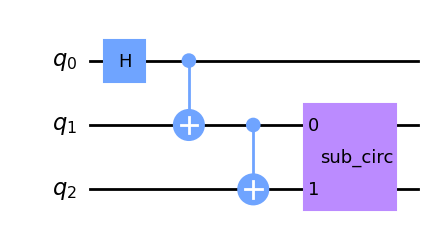

In [15]:
# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.barrier()
sub_circ.id(sub_q[1])
sub_circ.u(1, 2, -2, sub_q[0])

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [qr[1], qr[2]])

circ.draw()

In [34]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.x(2)

# Apply a gate to multiple qubit lines
qc.compose(gate, qubits=[0, 1, 2], inplace=True)

# Merge the qubit lines into a single output qubit line
qc.barrier([0, 1, 2])
qc.reset([0, 1, 2])
qc.compose(gate_merge, qubits=[0, 1, 2], inplace=True)

# Print the final circuit
print(qc)

Traceback (most recent call last):
  Cell In[34], line 7
    qc.compose(gate, qubits=[0, 1, 2], inplace=True)
NameError: name 'gate' is not defined

Use %tb to get the full traceback.


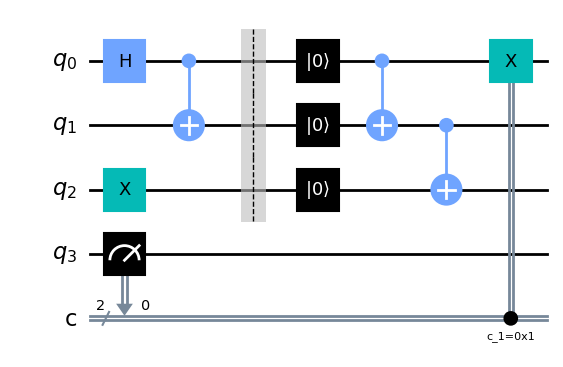

In [44]:
qc = QuantumCircuit(4, 2)
qc.h(0)
qc.cx(0, 1)
qc.x(2)

# Create a multi-qubit gate
multi_qubit_gate = QuantumCircuit(3)  # 3 qubits
multi_qubit_gate.cx(0, 1)
multi_qubit_gate.cx(1, 2)

# Merge the qubit lines into a single output qubit line
qc.barrier([0, 1, 2])
qc.reset([0, 1, 2])
qc.compose(multi_qubit_gate, qubits=[0, 1, 2], inplace=True)

# Measure the output qubit
output_qubit_index = 3
qc.measure(output_qubit_index, 0)

# Apply if-statement to conditionally invert the measurement outcome
qc.x(0).c_if(0b1, 1)

# Print the final circuit
qc.draw()

CODE TO GET COUNTS WHEN USING INSTRUCTIONS DEFINED INSIDE FUNCTION 
~~~
expTimes = 1000
transpiled_circuit = transpile(qc, basis_gates=['u1', 'u2', 'u3', 'cx', 'id'])
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpiled_circuit, shots=expTimes)
counts = job.result().get_counts(transpiled_circuit)
~~~

{'1110 1': 1}


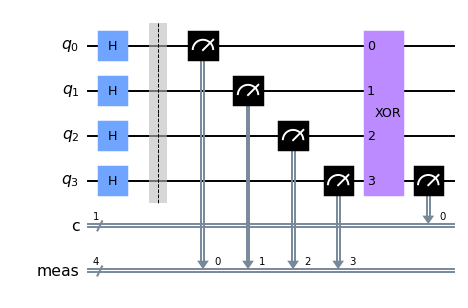

In [120]:
# Make a circuit with 4 qubits and 1 bit, 
# add the H gate to all qubits. 
# Create a XOR function, apply to all qubits, 
# Extend the intial circuit by adding at the end the XOR circuit, 
# Measure results after XOR implementations 
# --> measure the last qubit and store it on the classical bit.  


# -> 1st, define XOR function
def XOR(circ, qubitLines): 
    inputs = qubitLines
    listQubits = [i for i in range(len(inputs))]
    XOR_gate = QuantumCircuit(len(inputs), 1, name="XOR")
    
    # BULDING THE GATE
    # -> BUILD THE CIRCUIT
    # Build a register, and create the circuit in it
    XOR_register = QuantumRegister(len(inputs))
    XOR_qc = QuantumCircuit(XOR_register, name='XOR')
    # Add gates to circuit
    for i in range(len(inputs)-1): 
        XOR_gate.cx(i,i+1)
    # Add the ".id()" method to a qubit for connectivity/ reliablity 
    XOR_qc.id(XOR_register[len(inputs)-1])
    
    # -> CONVERT CIRCUIT TO GATE and stick it into an arbitrary place in the bigger circuit
    XOR_inst = XOR_qc.to_instruction()

    circ.append(XOR_inst, listQubits)
    
# -> 2nd, make the circuit and use the defined function 
N = 4                                       # Circuit before applying XOR gates
qc = QuantumCircuit(N, 1)
for i in range(N):
    qc.h(i)

qc.measure_all()

qub_to_apply_gate = [q for q in range(N)]    # Apply XOR to all qubits
XOR(qc, qub_to_apply_gate) 

qc.measure(len(qub_to_apply_gate)-1, 0)      # Measure results 

# CODE TO GET COUNTS WHEN USING INSTRUCTIONS DEFINED INSIDE FUNCTION 
expTimes = 1
transpiled_circuit = transpile(qc, basis_gates=['u1', 'u2', 'u3', 'cx', 'id'])
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpiled_circuit, shots=expTimes)
counts = job.result().get_counts(transpiled_circuit)

print(counts)

display(qc.draw(scale=0.7))

[[-1, -1], [-1, -1], [-1, -1], [-1, -1]]
i 0 k 0001
i 1 k 0100
i 2 k 0000
i 3 k 0101
[['0101', -1], ['0101', -1], ['0101', -1], ['0101', -1]]
v 17 , k 0001
arr: [['0101', -1], ['0101', -1], ['0101', -1], ['0101', -1]]
v 14 , k 0100
arr: [['0101', -1], ['0101', -1], ['0101', -1], ['0101', -1]]
v 9 , k 0000
arr: [['0101', -1], ['0101', -1], ['0101', -1], ['0101', -1]]
v 10 , k 0000
arr: [['0101', -1], ['0101', -1], ['0101', -1], ['0101', -1]]
v 9 , k 0100
arr: [['0101', -1], ['0101', -1], ['0101', -1], ['0101', -1]]
v 13 , k 0001
arr: [['0101', -1], ['0101', -1], ['0101', -1], ['0101', -1]]
v 11 , k 0101
arr: [['0101', 44], ['0101', 44], ['0101', 44], ['0101', 44]]
v 17 , k 0101
arr: [['0101', 112], ['0101', 112], ['0101', 112], ['0101', 112]]
Fin arr: [['0101', 112], ['0101', 112], ['0101', 112], ['0101', 112]]


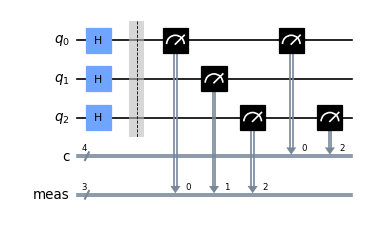

Total measurements from both measure_all() and classical register
{'011 0001': 17, '100 0100': 14, '000 0000': 9, '010 0000': 10, '110 0100': 9, '001 0001': 13, '101 0101': 11, '111 0101': 17}
Measurement Results from measure_all():
{'011': 17, '100': 14, '000': 9, '010': 10, '110': 9, '001': 13, '101': 11, '111': 17}
Measurement Results from measurements on classical register 'c':
{'0001': 13, '0100': 9, '0000': 10, '0101': 17}


In [119]:


#          N O N  -  W O R K I N G

# Create the quantum circuit
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(4, 'c')
qc = QuantumCircuit(qr, cr)

qc.h(qr)

# Measure all qubits using the measure_all() function
qc.measure_all()

# Measure some individual qubits and store the results in the classical register 'c'
qc.measure(qr[0], cr[0])
qc.measure(qr[2], cr[2])


# Execute the circuit on the simulator
simulation = Aer.get_backend('qasm_simulator')
job = simulation.run(qc, shots=100)
result = job.result()
counts = result.get_counts(qc)

# Results appear on from 
# <MEASURE_ALL_RES><SPACE><CLASSICAL_PIPE>":"<NUM><SPACE><NUM>

# Retrieve the counts for the measurement results from 'measure_all()'
counts_measure_all = {k[:qc.num_qubits]: v for k, v in counts.items()}

# Retrieve the counts for measurements on the classical register 'c'
dif_outputs = {k[qc.num_qubits+1:]: v for k, v in counts.items()}.keys()
arr = [[ -1, -1 ]] * len(dif_outputs)
print(arr)
i=0
for k in dif_outputs:
    print("i",i,"k",k)
    arr[i][0] = k
    i = i+1                                 # NO REASON alla bazei se ola mono to teleytaio
                                            # k - value, enw briskei se kathe gyro diaforetika
print(arr)
for k, v in counts.items():
    key = k[-cr.size:]
    print("v",v, ", k", key)
    for i in range(len(arr)): 
        if key == arr[i][0]:
            if arr[i][1] == -1:
                arr[i][1] = int(v)
            else:
                arr[i][1] = arr[i][1] + int(v)
    print("arr:", arr)
            
        
print("Fin arr:", arr)
counts_c = {k[qc.num_qubits+1:]: v for k, v in counts.items()}

display(qc.draw(scale=0.6))
print ("Total measurements from both measure_all() and classical register")
print(counts)

print("Measurement Results from measure_all():")
print(counts_measure_all)

print("Measurement Results from measurements on classical register 'c':")
print(counts_c)